In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Crop_and_fertilizer_with_usage.csv")
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Fertilizer_Usage
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,68.86
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,88.52
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,84.69
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,83.16
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.15


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District_Name     4513 non-null   object 
 1   Soil_color        4513 non-null   object 
 2   Nitrogen          4513 non-null   int64  
 3   Phosphorus        4513 non-null   int64  
 4   Potassium         4513 non-null   int64  
 5   pH                4513 non-null   float64
 6   Rainfall          4513 non-null   int64  
 7   Temperature       4513 non-null   int64  
 8   Crop              4513 non-null   object 
 9   Fertilizer        4513 non-null   object 
 10  Link              4513 non-null   object 
 11  Fertilizer_Usage  4513 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 423.2+ KB


In [16]:
df.drop(columns=["Link" , "Fertilizer" , "Fertilizer_Usage"],inplace=True)
df.head()


,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['District_Name'] = label_encoder.fit_transform(df['District_Name'])
df['Soil_color'] = label_encoder.fit_transform(df['Soil_color'])
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,0,0,75,50,100,6.5,1000,20,11
1,0,0,80,50,100,6.5,1000,20,11
2,0,0,85,50,100,6.5,1000,20,11
3,0,0,90,50,100,6.5,1000,20,11
4,0,0,95,50,100,6.5,1000,20,11


In [18]:
# from sklearn.model_selection import train_test_split
# x = df.drop(columns=["Crop"])  # Features
# y = df["Crop"]  # Target variable

In [19]:
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# # Step 5: Normalize the data to improve model performance
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# xtrain = scaler.fit_transform(xtrain)
# xtest = scaler.transform(xtest)

In [21]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(xtrain, ytrain)


In [22]:
# ypred = model.predict(xtest)

In [23]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(ytest, ypred)
# mse = mean_squared_error(ytest, ypred)
# r2 = r2_score(ytest, ypred)

# # Print results
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared Score:", r2)

Precision: 0.8592256857853598
Recall: 0.8560354374307863
F2 Score: 0.8543471974323004


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21480\2365930960.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette='viridis')


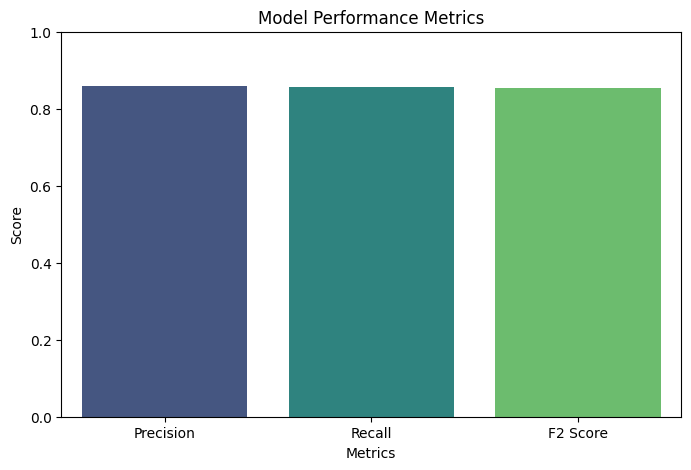

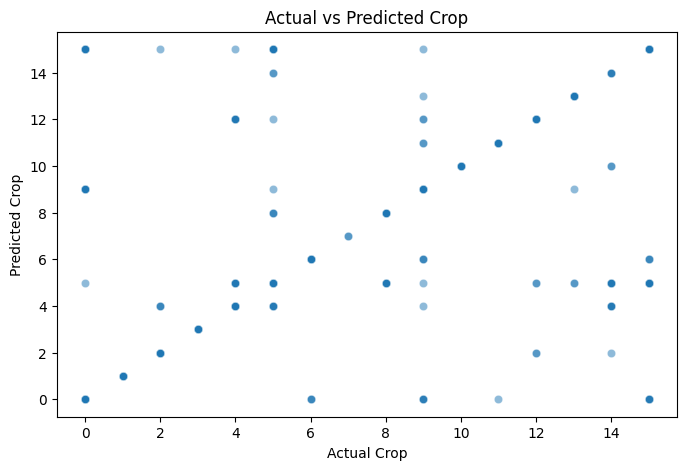

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, precision_score, recall_score

# Assuming df is already defined
x = df.drop(columns=["Crop"])  # Features
y = df["Crop"]  # Target variable

# Train-Test Split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

# Compute Precision, Recall, and F2 Score
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f2 = fbeta_score(ytest, ypred, beta=2, average='weighted')

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2)

# Plot a bar graph for metrics
metrics = {'Precision': precision, 'Recall': recall, 'F2 Score': f2}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=values, palette='viridis')
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.show()

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=ytest, y=ypred, alpha=0.5)
plt.xlabel("Actual Crop")
plt.ylabel("Predicted Crop")
plt.title("Actual vs Predicted Crop")
plt.show()
